<a href="https://colab.research.google.com/github/grrruning/scientific-python/blob/main/Middle_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

task1

DON  
TPA  
NIC

task2

In [38]:
import pandas as pd
import seaborn as sns

data = pd.read_csv("data_for_task2.csv")

data = data.groupby("genus").mean().reset_index()
data

,genus,sucrose,alanin,citrate,glucose,oleic_acid
0,Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
1,Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
2,Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
3,Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
4,Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


In [39]:
formatted_df = pd.melt(
    frame = data,
    id_vars = "genus")

formatted_df.head(30)

,genus,variable,value
0,Ascophyllum,sucrose,6.825467
1,Cladophora,sucrose,4.008792
2,Fucus,sucrose,4.355112
3,Palmaria,sucrose,0.704580
4,Saccharina,sucrose,4.183596
5,Ascophyllum,alanin,0.875429
6,Cladophora,alanin,3.997055
7,Fucus,alanin,3.566411
8,Palmaria,alanin,3.176440
9,Saccharina,alanin,3.524207


[Text(0, 0, 'sucrose'),
 Text(0, 0, 'alanin'),
 Text(0, 0, 'citrate'),
 Text(0, 0, 'glucose'),
 Text(0, 0, 'oleic_acid')]

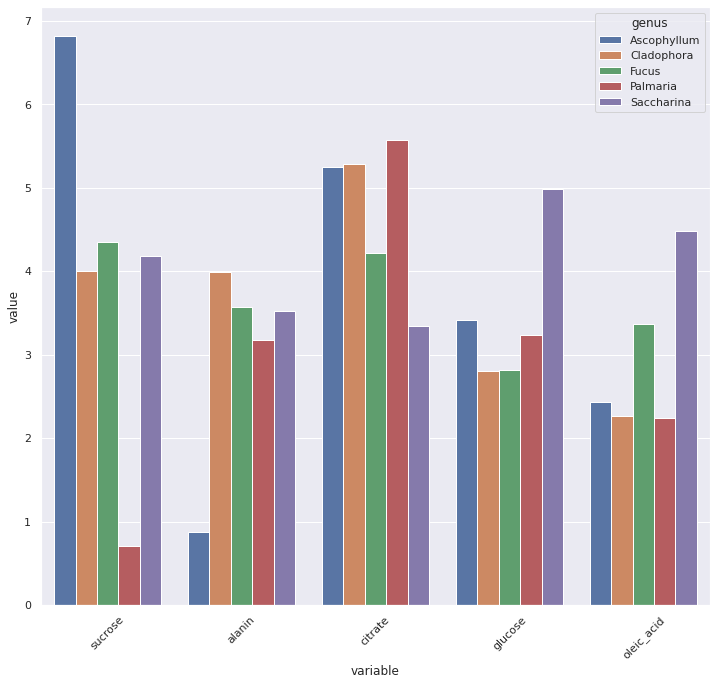

In [44]:
sns.set(rc={'figure.figsize':(12,11)})

g = sns.barplot(x="variable",
                y="value", 
                hue="genus", 
                data = formatted_df)

g.set_xticklabels(g.get_xticklabels(),
                  rotation=45)

task3

In [65]:




numbers = [1,2,3,4,5,6]
my_iter = map(lambda x: (x % 3) == 0, numbers)

a = 1
while (a == 1):
  b = next(my_iter)
  print(b)


False
False
True
False
False
True


StopIteration: ignored

In [99]:

numbers = [1,2,3,4,5,6]
my_iter = map(lambda x: (x % 3) == 0, numbers)
while (a == 1):
  try:
     b = next(my_iter)
     print(b)

  except StopIteration:
    print("Stop iteration")
    break

False
False
True
False
False
True
Stop iteration


task4

In [119]:
import requests
numbers = [22, 43, 264, 1990]

base_url = "http://numbersapi.com/"
nums = ','.join(str(x) for x in numbers)

def get_facts(nums, fact_type):
  headers = {'Content-Type': 'application/json'}
  prefix = fact_type.upper() + ": "
  if fact_type == 'year':
      prefix = "HIST: "

  url = base_url + nums + "/" + fact_type
  response = requests.get(url, headers=headers).json()
  for number in response:
    if response[number]["found"]:
      yield number, prefix + response[number]["text"]


for number, fact  in get_facts(nums, "year"):
  print(number + " " + fact)


for number, fact in get_facts(nums, "math"):
  print(number + " " + fact)


22 HIST: 22 is the year that Marcus Cocceius Nerva and Gaius Vibius Rufinus are consuls Ex Kal.
43 HIST: 43 is the year that the warrior Trung Sisters commit suicide after their resistance is defeated at Nam Viet in Vietnam.
264 HIST: 264 is the year that Jiang Wei tries to restore the Kingdom of Shu by persuading Zhong Hui to declare a rebellion against Sima Zhao, ruler of Cao Wei.
1990 HIST: 1990 is the year that the World Health Organization removes homosexuality from its list of diseases on May 17th.
22 MATH: 22 is an even composite number, its proper divisors being 1, 2 and 11.
43 MATH: 43 is the number of sided 7-iamonds.
264 MATH: 264 is the largest known number whose square is undulating.
1990 MATH: 1990 is a stella octangula number.


Iterators require less memory, more convenient than arrays, because you do not need to work with the entire array.

task5

In [111]:
!pip3 install cobra

     |████████████████████████████████| 2.4MB 6.9MB/s 
     |████████████████████████████████| 204kB 36.5MB/s 
     |████████████████████████████████| 2.1MB 38.1MB/s 
     |████████████████████████████████| 153kB 40.0MB/s 
     |████████████████████████████████| 81kB 8.3MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 6.2MB 23.0MB/s 
     |████████████████████████████████| 102kB 9.8MB/s 
     |████████████████████████████████| 10.1MB 32.5MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 552kB 14.3MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 


In [160]:
from cobra import test
model = test.create_test_model("textbook") # Name: e_coli_core

Lets obeserve NADH production before knockout

In [161]:
model.metabolites.nadh_c.summary().producing_flux.flux.sum()


38.53460965051545

In [162]:
model.optimize()
model.genes.b3236.knock_out()


And after:

In [163]:
model.metabolites.nadh_c.summary().producing_flux.flux.sum()

40.35544948241886